In [15]:
import cv2
from matplotlib import pyplot as plt

#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot

def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

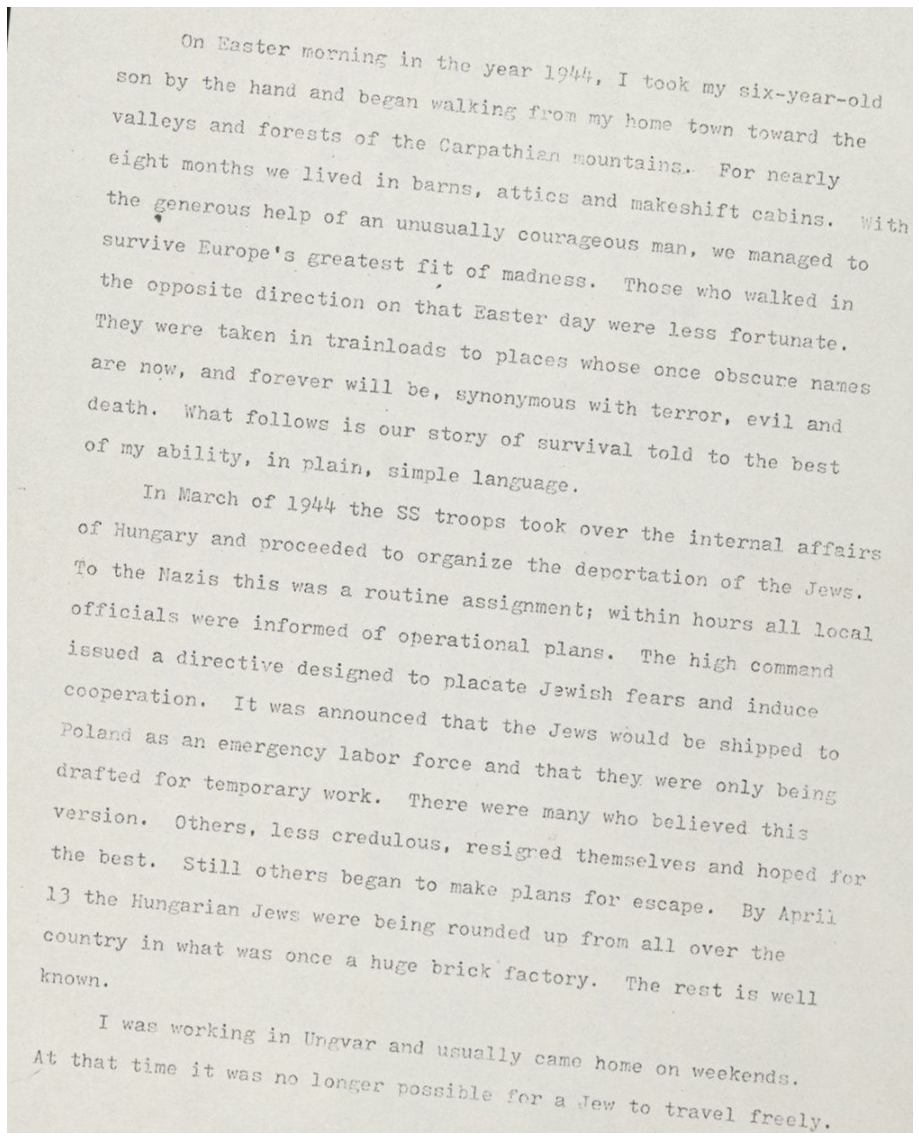

In [7]:
img = cv2.imread("page_01_rotated.JPG")
display("page_01_rotated.JPG")

28


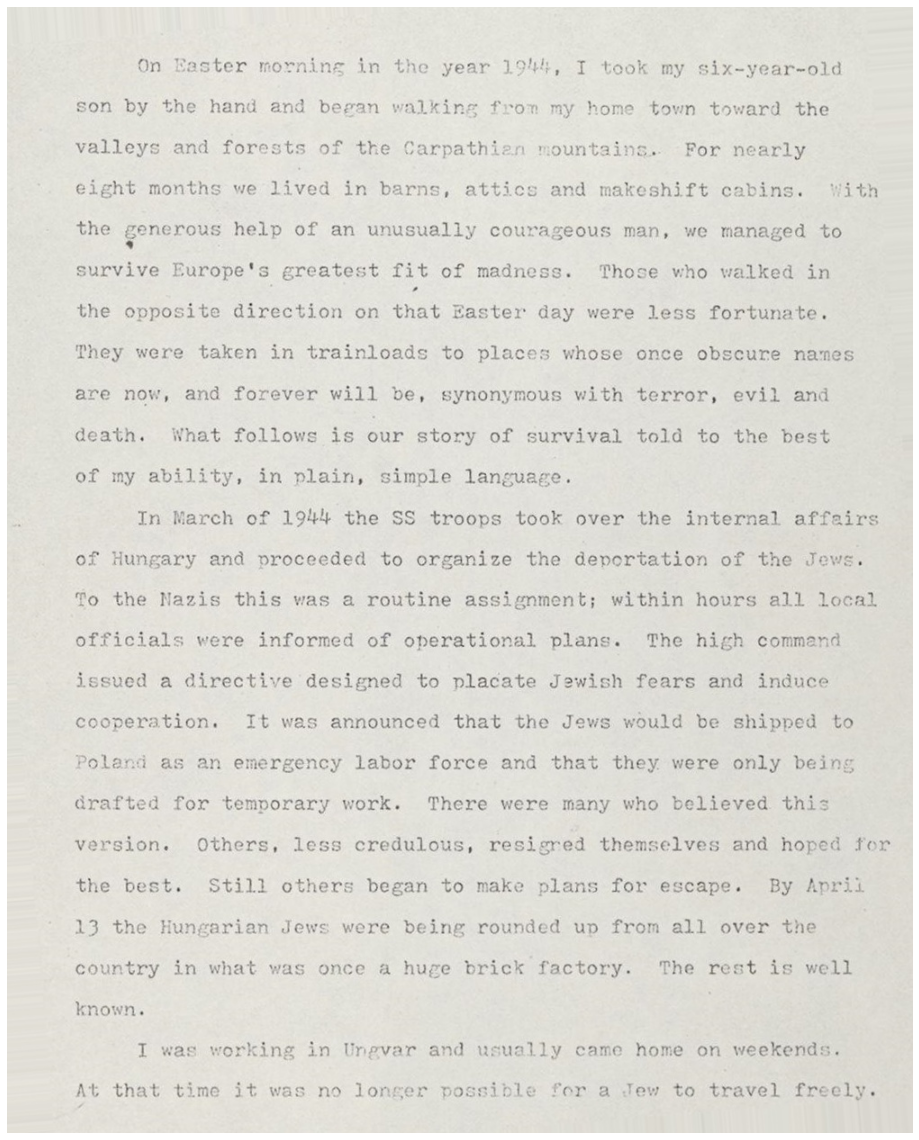

In [9]:
#https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df
import numpy as np

def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

fixed = deskew(img)
cv2.imwrite("rotated_fixed.jpg", fixed)

display("rotated_fixed.jpg")

In [ ]:
Partie OCR

In [14]:
import pytesseract
from PIL import Image

# For Windows, we have to specify path of Tesseract.exe
#######################################################

path_to_tesseract = r"D:/DEV/Tesseract-OCR/tesseract.exe"
pytesseract.pytesseract.tesseract_cmd = path_to_tesseract

img = Image.open("rotated_fixed.jpg")

ocr_result = pytesseract.image_to_string(img)

print(ocr_result)

On Easter morning in the year 1944, I took my six-year-old
son by the hand and began walking from my home town toward the
valleys and forests of the Carpathien mountaing.. For nearly
eight months we lived in barns, attics and makeshift cabins. With
the generous help of an unusually courageous man, we managed to
survive Europe's greatest fit of madness. Those who walked in
the opposite direction on that Easter day were less fortunate.
They were taken in trainloads to places whose once obscure names
are now, and forever will be, synonymous with terror, evil and
death. What follows is our story of survival told to the best
of my ability, in plain, simple language.

In March of 194% the SS troops took over the internal affairs
of Hungary and proceeded to organize the deportation of the Jews.
fo the Nazis this was a routine assignment; within hours all local
officials were informed of operational plans. The high command
issued a directive designed to placate Jewish fears and induce
cooperat